In [9]:
!pip3 install yfinance lxml matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 153.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 163.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 185.7 MB/s eta 0:00:00


## 1. Extracting Tesla Stock Data Using yfinance

In [4]:
import yfinance as yf

tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period='max') 
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## 2. Extracting Tesla Revenue Data Using Webscraping

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO 

url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
headers = {'User-Agent': 'Mozilla/5.0'}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

html_string = str(soup)
tables = pd.read_html(StringIO(html_string))  
revenue_data_tesla = tables[1]
revenue_data_tesla.head()

,Tesla Quarterly Revenue (Millions of US $),Tesla Quarterly Revenue (Millions of US $).1
0,2025-03-31,"$19,335"
1,2024-12-31,"$25,707"
2,2024-09-30,"$25,182"
3,2024-06-30,"$25,500"
4,2024-03-31,"$21,301"


## 3. Extracting GameStop Stock Data Using yfinance

In [29]:
import yfinance as yf

gamestop = yf.Ticker('GME')
gamestop_data = gamestop.history(period='max') 
gamestop_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## 4. Extracting GameStop Revenue Data Using Webscraping

In [30]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO 

url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
headers = {'User-Agent': 'Mozilla/5.0'}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

html_string = str(soup)
tables = pd.read_html(StringIO(html_string))  
revenue_data_gs = tables[1]
revenue_data_gs.head()

,GameStop Quarterly Revenue (Millions of US $),GameStop Quarterly Revenue (Millions of US $).1
0,2025-04-30,$732
1,2025-01-31,"$1,283"
2,2024-10-31,$860
3,2024-07-31,$798
4,2024-04-30,$882


## 5. Tesla Stock and Revenue Dashboard

/tmp/ipykernel_339/3895069904.py:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_tesla = tesla_data.resample('Q').last().reset_index()
/tmp/ipykernel_339/3895069904.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_tesla['Date'] = df_tesla['Date'].dt.to_period('Q').dt.to_timestamp()


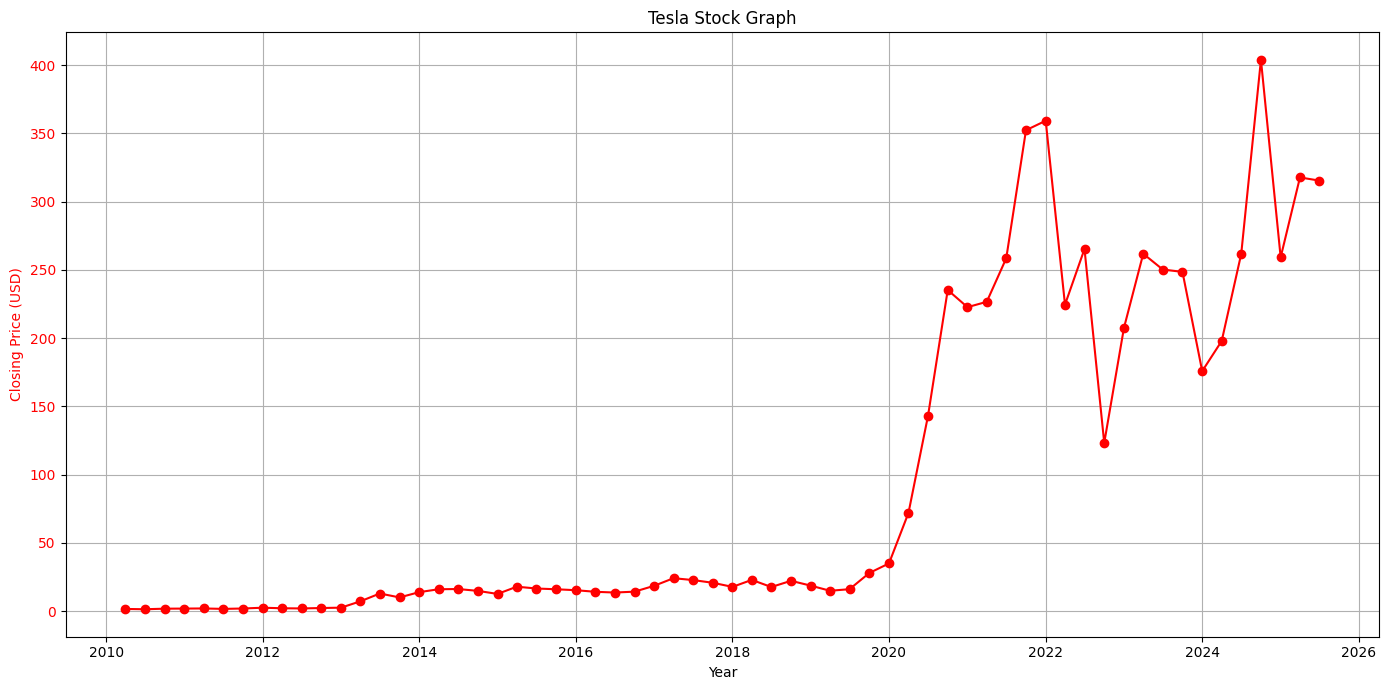

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

df_tesla = tesla_data.resample('Q').last().reset_index()
df_tesla['Date'] = df_tesla['Date'].dt.to_period('Q').dt.to_timestamp()

fig, ax1 = plt.subplots(figsize=(14, 7))
color1 = 'red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Closing Price (USD)', color=color1)
ax1.plot(df_tesla['Date'], df_tesla['Close'], color=color1, marker='o', label='Tesla Stock')
ax1.tick_params(axis='y', labelcolor=color1)

plt.title("Tesla Stock Graph")
fig.tight_layout()
plt.grid(True)
plt.show()

## 6. GameStop Stock and Revenue Dashboard

/tmp/ipykernel_339/2950838498.py:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_gamestop = gamestop_data.resample('Q').last().reset_index()
/tmp/ipykernel_339/2950838498.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_gamestop['Date'] = df_gamestop['Date'].dt.to_period('Q').dt.to_timestamp()


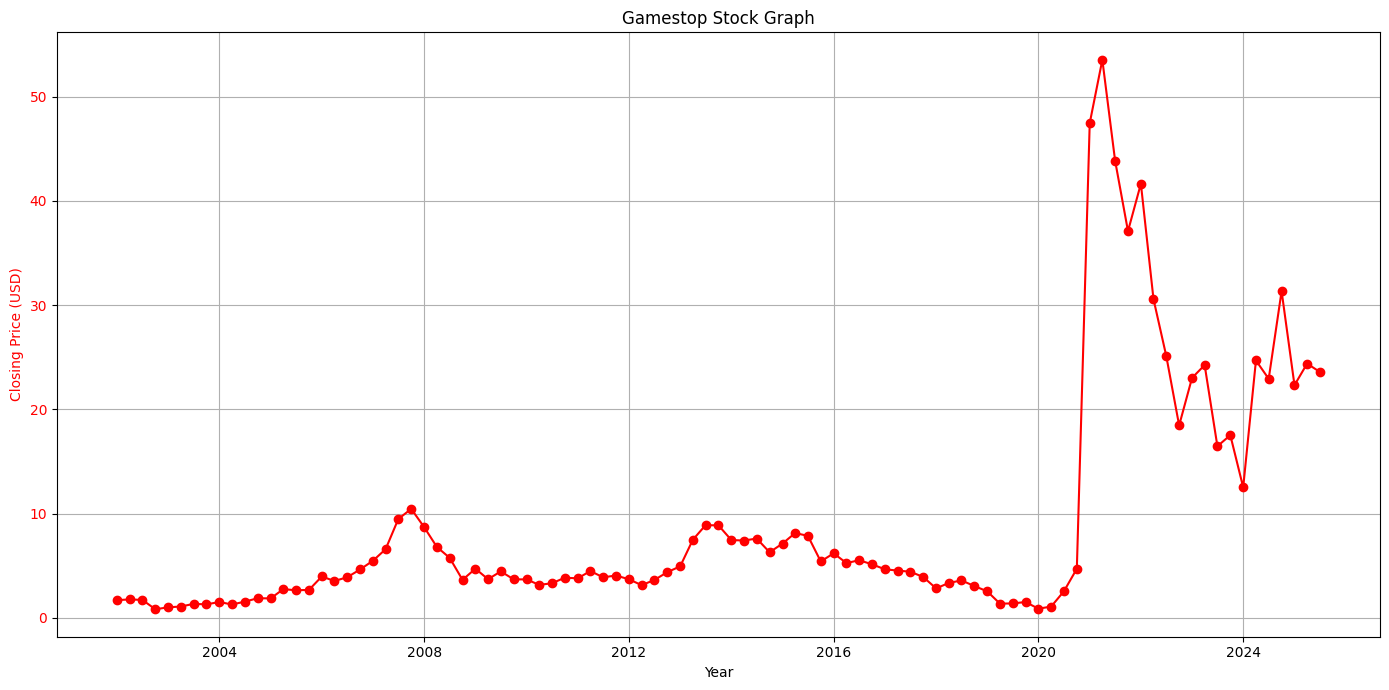

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

df_gamestop = gamestop_data.resample('Q').last().reset_index()
df_gamestop['Date'] = df_gamestop['Date'].dt.to_period('Q').dt.to_timestamp()

fig, ax1 = plt.subplots(figsize=(14, 7))
color1 = 'red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Closing Price (USD)', color=color1)
ax1.plot(df_gamestop['Date'], df_gamestop['Close'], color=color1, marker='o', label='Gamestop Stock')
ax1.tick_params(axis='y', labelcolor=color1)

plt.title('Gamestop Stock Graph')
fig.tight_layout()
plt.grid(True)
plt.show()